![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ast import literal_eval
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/positive-words/positive_words.csv
/kaggle/input/world-cities/worldcities.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [14]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [16]:
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
17885,id_155,Budapest,"['Barbecue', 'European', 'Eastern European', '...",156.0,$$ - $$$,2366.0,"[['Nice experience', 'Unique dinner'], ['01/07...",/Restaurant_Review-g274887-d808798-Reviews-Sir...,d808798,1,4.0
30538,id_3341,Madrid,NaN,3343.0,NaN,31.0,"[['Great meal'], ['08/18/2017']]",/Restaurant_Review-g187514-d5486942-Reviews-Re...,d5486942,1,4.0
15480,id_3215,Paris,['French'],3216.0,$$ - $$$,39.0,"[['great food, nice ambience, friendly servic....",/Restaurant_Review-g187147-d8755509-Reviews-Lo...,d8755509,1,4.5
45138,id_5463,Milan,"['Japanese', 'Asian']",5466.0,$$ - $$$,56.0,"[['Interesting surprise'], ['06/17/2015']]",/Restaurant_Review-g187849-d3842552-Reviews-Ts...,d3842552,1,3.5
8437,id_8437,Geneva,['Vegetarian Friendly'],332.0,$$$$,18.0,[['Much better than a typical Geneva Restaura....,/Restaurant_Review-g188057-d12114039-Reviews-M...,d12114039,0,0.0


Загрузим дополнительные данные по городам

In [17]:
cities = pd.read_csv('/kaggle/input/world-cities/worldcities.csv')
cities = cities[~cities['iso2'].isin(['US', 'CA'])]

Обработаем данные по городам чтобы в дальнейшем можно было получить признаки Страна, Население и Столичность

In [20]:
population = {}
capital = []
country = {}

def get_city_data(row):
    """Функция заполняет справочники population, capital и country"""
    population.update({row['city_ascii']: row['population']})
    country.update({row['city_ascii']: row['country']})
    if row['capital']=='primary':
        capital.append(row['city_ascii'])


df['City'] = df['City'].apply(lambda x: 'Porto' if x=='Oporto' else x) # везде Porto в справочниках
city_list = list(df['City'].unique()) # формируем лист городов присутствующих в датасете
cities[cities['city_ascii'].isin(city_list)].apply(get_city_data, axis = 1)
display(population, country, capital)

{'Paris': 11020000.0,
 'London': 10979000.0,
 'Barcelona': 448016.0,
 'Berlin': 3644826.0,
 'Madrid': 3266126.0,
 'Rome': 2872800.0,
 'Vienna': 1840573.0,
 'Hamburg': 1841179.0,
 'Warsaw': 1790658.0,
 'Budapest': 1752286.0,
 'Munich': 1471508.0,
 'Milan': 1351562.0,
 'Prague': 1324277.0,
 'Dublin': 1173179.0,
 'Copenhagen': 1085000.0,
 'Amsterdam': 1031000.0,
 'Stockholm': 972647.0,
 'Oslo': 693494.0,
 'Athens': 664046.0,
 'Helsinki': 642045.0,
 'Lisbon': 506654.0,
 'Bratislava': 429564.0,
 'Ljubljana': 284355.0,
 'Brussels': 185103.0,
 'Luxembourg': 122273.0,
 'Krakow': 766739.0,
 'Lyon': 516092.0,
 'Edinburgh': 488050.0,
 'Zurich': 434008.0,
 'Porto': 237591.0,
 'Geneva': 201818.0}

{'Paris': 'France',
 'London': 'United Kingdom',
 'Barcelona': 'Venezuela',
 'Berlin': 'Germany',
 'Madrid': 'Spain',
 'Rome': 'Italy',
 'Vienna': 'Austria',
 'Hamburg': 'Germany',
 'Warsaw': 'Poland',
 'Budapest': 'Hungary',
 'Munich': 'Germany',
 'Milan': 'Italy',
 'Prague': 'Czechia',
 'Dublin': 'Ireland',
 'Copenhagen': 'Denmark',
 'Amsterdam': 'Netherlands',
 'Stockholm': 'Sweden',
 'Oslo': 'Norway',
 'Athens': 'Greece',
 'Helsinki': 'Finland',
 'Lisbon': 'Portugal',
 'Bratislava': 'Slovakia',
 'Ljubljana': 'Slovenia',
 'Brussels': 'Belgium',
 'Luxembourg': 'Luxembourg',
 'Krakow': 'Poland',
 'Lyon': 'France',
 'Edinburgh': 'United Kingdom',
 'Zurich': 'Switzerland',
 'Porto': 'Portugal',
 'Geneva': 'Switzerland'}

['Paris',
 'London',
 'Berlin',
 'Madrid',
 'Rome',
 'Vienna',
 'Warsaw',
 'Budapest',
 'Prague',
 'Dublin',
 'Copenhagen',
 'Amsterdam',
 'Stockholm',
 'Oslo',
 'Athens',
 'Helsinki',
 'Lisbon',
 'Bratislava',
 'Ljubljana',
 'Brussels',
 'Luxembourg']

Приведем имена колонок в удобный вид

In [23]:
df.columns = ['Restaurant_id', 'City', 'Cuisine_Style', 'Ranking', 'Price_Range',
    'Number_of_Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating']

Оценим количество пропусков в данных

In [24]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine_Style        38410 non-null object
Ranking              50000 non-null float64
Price_Range          32639 non-null object
Number_of_Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Restaurant_id            0
City                     0
Cuisine_Style        11590
Ranking                  0
Price_Range          17361
Number_of_Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [ ]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [ ]:
data['Number_of_Reviews_isNAN']

In [ ]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [25]:
df.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine_Style        10732
Ranking              12975
Price_Range              4
Number_of_Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Категориальными можно считать City и Price Range

Начнем с City
# City

In [26]:
len(city_list)

31

Всего в датасете у нас 31 ресторан

In [28]:
# Создадим новый признак - количество ресторанов в городе
df['Rests_in_City'] = df['City'].map(df.groupby(['City'])['Restaurant_id'].count().to_dict())

In [29]:
# Создадим новый признак, что ресторан находится в столице
df['Is_Capital'] = df['City'].apply(lambda x: 1 if x in capital else 0)

In [30]:
df['Country'] = df['City'].map(country) # Новый признак - Страна

In [31]:
df['City_Population'] = df['City'].map(population) # Население города
df['Rests_per_Person'] = df['Rests_in_City'] / df['City_Population'] # Оцениваем количество ресторанов на одного жителя

In [32]:
df['Ranking_Norm'] = df['Ranking'] / df['Rests_in_City'] # Нормируем Ranking количеством ресторанов на город

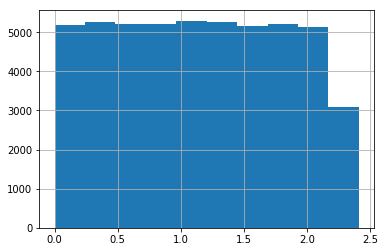

In [33]:
df['Ranking_Norm'].hist()

# По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3

In [34]:
df['Price_Range'].value_counts(dropna = False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price_Range, dtype: int64

Есть много пропусков, нужно оценить как их можно заполнить

In [35]:
df['Price_Range_NAN'] = pd.isna(df['Price_Range']).astype('uint8')

In [36]:
price_dict = {'$': 1,
              '$$ - $$$': 2,
              '$$$$': 3}

df['Price_Range'] = df['Price_Range'].map(price_dict)

In [52]:
display(df['Price_Range'].describe())
pd.concat([df.groupby(['City'])['Price_Range'].mean(), df.groupby(['City'])['Price_Range'].median()], axis = 1)

count    32639.000000
mean         1.815129
std          0.509800
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Price_Range, dtype: float64

,Price_Range,Price_Range
City,,
Amsterdam,1.832700,2.0
Athens,1.706767,2.0
Barcelona,1.783784,2.0
Berlin,1.743094,2.0
Bratislava,1.863636,2.0
Brussels,1.858974,2.0
Budapest,1.718169,2.0
Copenhagen,1.900369,2.0
Dublin,1.788644,2.0


Оценим пропуски в Price_Range по городам

In [49]:
df_city_NAN = pd.concat([df[df['Price_Range'].isna()].groupby(['City'])['Price_Range_NAN'].count(), 
           df.groupby(['City'])['City'].count()], axis = 1)
df_city_NAN['NAN'] = 100* df_city_NAN['Price_Range_NAN'] / df_city_NAN['City']
display(df_city_NAN)
df_city_NAN.NAN.describe()

,Price_Range_NAN,City,NAN
City,,,
Amsterdam,320,1372,23.323615
Athens,244,776,31.443299
Barcelona,1138,3395,33.519882
Berlin,1257,2705,46.469501
Bratislava,204,380,53.684211
Brussels,456,1314,34.703196
Budapest,322,1021,31.537708
Copenhagen,277,819,33.821734
Dublin,202,836,24.162679


count    31.000000
mean     34.922410
std       8.746078
min      19.463087
25%      31.201651
50%      33.263158
75%      39.554806
max      55.733558
Name: NAN, dtype: float64

Среднее почти совпадает с медианой - 33% и равно 35%, но есть города с большим количеством пропусков (>50%) по категории ресторана при этом по всем городам медиана равна  2, среднее находится в диапазоне от 1.65 до 2.05 что позволяет нам сделать предположение, заполнение пропусков медианной величиной не повлечет за собой негативных последствий.
Оценим влияние на Рейтинг пропусков.

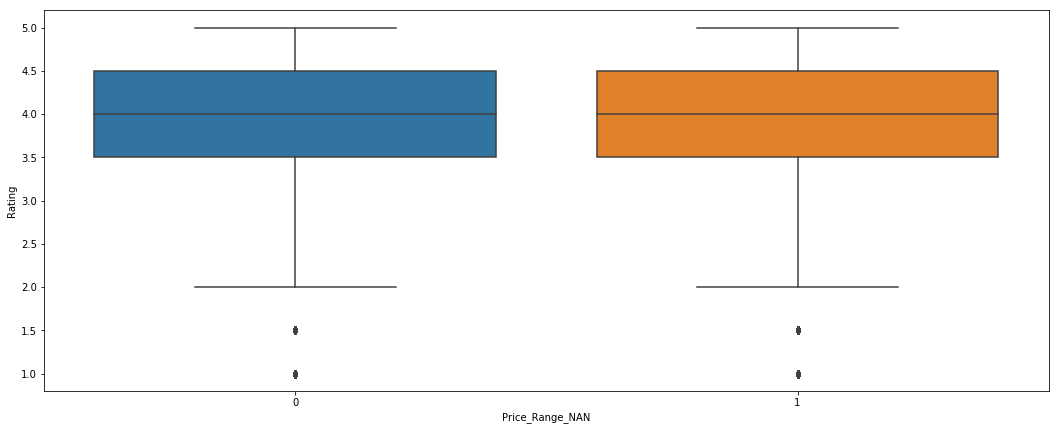

In [55]:
plt.figure(figsize=(18, 7))
sns.boxplot(x = 'Price_Range_NAN', y = 'Rating', data = df[df['sample']==1])

Видно, что пропуски на целевую переменную влияния не оказывают.

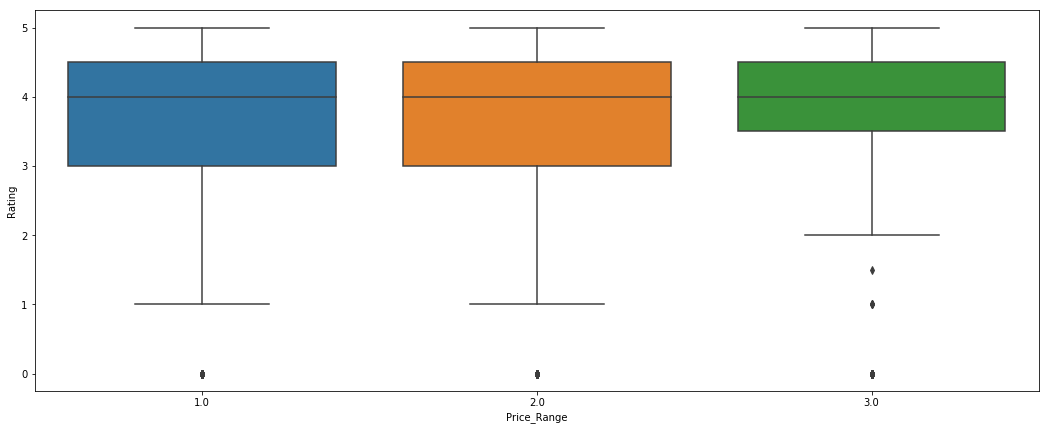

In [57]:
df['Price_Range'].fillna(2, inplace = True)
plt.figure(figsize=(18, 7))
sns.boxplot(x = 'Price_Range', y = 'Rating', data = df)

Из графика можно сделать вывод что ресторавы высшей ценовой категории реже получают плохие оценки.

## Restaurant_id

In [58]:
rest_chain = df.Restaurant_id.value_counts()
rest_chain = list(rest_chain.loc[rest_chain > 1].index)

df['Network'] = df['Restaurant_id'].apply(lambda x: 1 if x in rest_chain else 0)
#Добавили новый признак - сетевой ли ресторан

## Cuisines

In [59]:
df['Cuisine_Style_NAN'] = pd.isna(df['Cuisine_Style']).astype('uint8') # Признак "пропуск ли"

Обработаем признак и сделаем его элементы списками

In [62]:
df['Cuisine_Style'] = df['Cuisine_Style'].apply(lambda x: x if str(x)=='nan' else literal_eval(x))

In [64]:
df['Cuisine_Number'] = df['Cuisine_Style'].apply(lambda x: 1 if str(x)=='nan' else len(x)) 
# Признак количества кухонь представленных в ресторане
df['Cuisine_Number_Norm'] = df['Cuisine_Number']/df['City'].map(df.groupby(['City'])['Cuisine_Number'].max())
# Нормируем по максимальному количеству кухонь представленных в ресторане города

Посчитаем разные типы кухонь, какие представлены чаще, какие реже всего

In [65]:
cuisine_number = df['Cuisine_Style'].dropna().explode().value_counts()
display(cuisine_number.describe())
cuisine_rare = list(cuisine_number[cuisine_number<=cuisine_number.quantile(0.5)].index)
cuisine_popular = list(cuisine_number[cuisine_number>=cuisine_number.quantile(0.75)].index)

count      125.000000
mean       957.408000
std       2106.073342
min          1.000000
25%         27.000000
50%        199.000000
75%        748.000000
max      14021.000000
Name: Cuisine_Style, dtype: float64

In [66]:
def find_in_list(item, item_list):
    """Ищет элемент item в списке item_list"""
    for cell in item:
        if cell in item_list:
            return 1
        else: continue
    return 0

df['Cuisine_Popular'] = df['Cuisine_Style'].dropna().apply(lambda x: find_in_list(x, cuisine_popular))
df['Cuisine_Rare'] = df['Cuisine_Style'].dropna().apply(lambda x: find_in_list(x, cuisine_rare))
df['Cuisine_Rare'].fillna(0, inplace = True)
df['Cuisine_Popular'].fillna(0, inplace = True)
# Создали признаки популярной и редкой кухонь

In [67]:
multi_cuisine = df.groupby(['City'])['Cuisine_Number'].mean().round(0)
df['Cuisine_Multi'] = df['City'].map(multi_cuisine)
df['Cuisine_Multi'] = df.apply(lambda row: 1 if row['Cuisine_Number']>= row['Cuisine_Multi'] else 0, axis = 1)
# Признак показывает, что в ресторане количество кухонь больше среднего по городу

In [68]:
def get_cuisine_top(item):
    """Функция получает кухни из топа для ресторана
    Для остальных кухонь происходит замена на 'Other'"""
    cuisine_top = []
    if str(item) == 'nan':
        cuisine_top.append('Other')
    else:
        for cell in item:
            if cell in cuisine_popular:
                cuisine_top.append(cell)
            elif 'Other' not in cuisine_top:
                cuisine_top.append('Other')
    
    return cuisine_top

df['Cuisine_Top'] = df['Cuisine_Style'].apply(get_cuisine_top)

## Reviews
Сначала поправим некорректные данные и превратим значения в список из двух списков

In [69]:
df['Reviews'] = df['Reviews'].dropna().apply(
    lambda x: literal_eval(str(x).replace('nan', '').replace('[,', "['',")))
df['Reviews'] = df['Reviews'].dropna().apply(
    lambda x: np.nan if len(x[0]) == 0 & len(x[1]) == 0 else x)

Второй список каждого элемента представляет собой список из двух дат последних отзывов

In [70]:
df['Date'] = df['Reviews'].dropna().apply(lambda x: x[1])
df['Date_1'] = df['Date'].dropna().apply(lambda x: x[1] if len(x)==2 else x[0] if len(x)==1 else np.nan)
df['Date_2'] = df['Date'].dropna().apply(lambda x: x[0] if len(x)==2 else np.nan)
df.drop('Date', axis=1, inplace=True)
df['Date_1'] = pd.to_datetime(df['Date_1'])
df['Date_2'] = pd.to_datetime(df['Date_2'])
df['Date_1'].fillna(df['Date_1'].min(), inplace = True)
df['Date_2'].fillna(df['Date_2'].max(), inplace = True)

Определим признак - количество дней между обзорами

count    50000.000000
mean       998.064080
std       1815.099705
min          0.000000
25%         34.000000
50%        127.000000
75%        537.250000
max       5059.000000
Name: Days_Review, dtype: float64

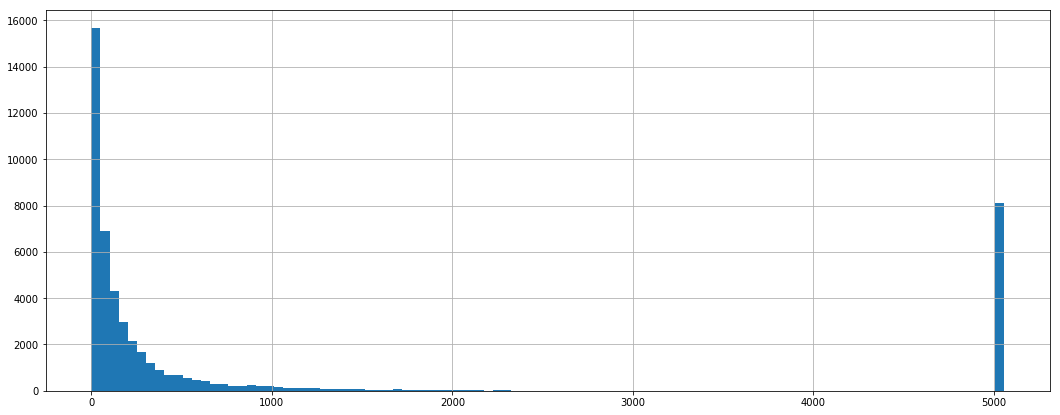

In [71]:
df['Days_Review'] = abs(df['Date_2'] - df['Date_1']).dt.days
plt.figure(figsize=(18, 7))
df['Days_Review'].hist(bins=100)
df['Days_Review'].describe()
#Большое количество дней говорит о том что отзывы не оставляют

Следующий признак - дней до сегодня от последнего отзыва

count    50000.000000
mean      1226.560900
std        257.200353
min       1051.000000
25%       1051.000000
50%       1141.000000
75%       1278.000000
max       4663.000000
Name: Days_to_Today, dtype: float64

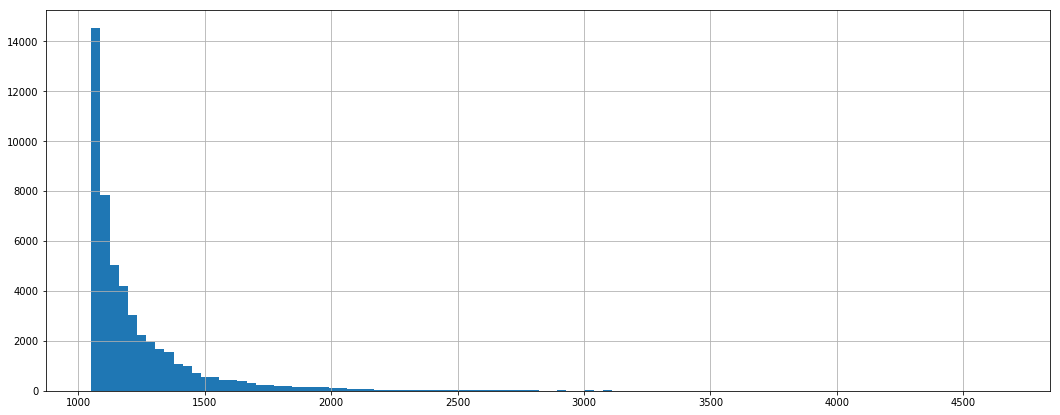

In [74]:
df['Days_to_Today'] = (datetime.now() - df['Date_2']).dt.days
plt.figure(figsize=(18, 7))
df['Days_to_Today'].hist(bins=100)
df['Days_to_Today'].describe()

Признаки немного коррелируют между собой

In [75]:
df[['Days_Review', 'Days_to_Today']].corr()

,Days_Review,Days_to_Today
Days_Review,1.000000,-0.297837
Days_to_Today,-0.297837,1.000000


Теперь перейдем к самим отзывам

In [76]:
df['Reviews'] = df['Reviews'].dropna().apply(lambda x: x[0])
df['Last_Reviews'] = df['Reviews'].apply(lambda x: 0 if str(x)=='nan' else len(x))
#Признак количества последних отзывов. Три категории: 0, 1, 2 по количеству информации.

In [77]:
df['Last_Reviews'].describe()

count    50000.00000
mean         1.56182
std          0.75548
min          0.00000
25%          1.00000
50%          2.00000
75%          2.00000
max          2.00000
Name: Last_Reviews, dtype: float64

Оценим длину отзывов, которые оставляют

In [78]:
def review_len(cell):
    """Оценивает среднюю длину строкового элементов списка"""
    if str(cell) == 'nan': return 0
    elif len(cell) == 0: return 0
    else:
        lenght = 0
        for rev in cell:
            lenght += len(rev)
        return lenght / len(cell)
    
df['Reviews_Len'] = df['Reviews'].apply(review_len)

In [79]:
df['Reviews_Len'].describe()

count    50000.000000
mean        19.993250
std         11.914646
min          0.000000
25%         13.000000
50%         21.000000
75%         28.500000
max         45.000000
Name: Reviews_Len, dtype: float64

Пользователи оставляют чаще короткие отзывы, среднее и медиана около 20 знаков

Поработаем немного с самим отзывами - оценим позитивность оставляемых отзывов

In [81]:
positive_words = pd.read_csv('/kaggle/input/positive-words/positive_words.csv', header = None)[0].to_list()

def find_positive_words(cell):
    """Ищет слова в словаре - списке положительно окрашенных слов"""
    if str(cell) == 'nan': return 0
    elif len(cell) == 0: return 0
    else:
        num_words = 0
        num_words_total = 0
        for rev in cell:
            for word in rev.lower().split():
                num_words_total += 1
                if word in positive_words:
                    num_words += 1
        
    if num_words_total == 0: return 0
    else: return num_words / num_words_total
        
df['Positiveness'] = df['Reviews'].apply(find_positive_words)

## Number of Reviews

In [82]:
df[df['Number_of_Reviews'].isna()][['Number_of_Reviews', 'Last_Reviews']]

,Number_of_Reviews,Last_Reviews
7,NaN,0
25,NaN,0
53,NaN,0
74,NaN,1
81,NaN,0
...,...,...
49965,NaN,0
49972,NaN,1
49986,NaN,0
49988,NaN,0


Есть пропуски к которым были отзывы в колонке Reviews, заменим их.

In [83]:
df.loc[df['Number_of_Reviews'].isna(),['Number_of_Reviews']] = df['Last_Reviews']

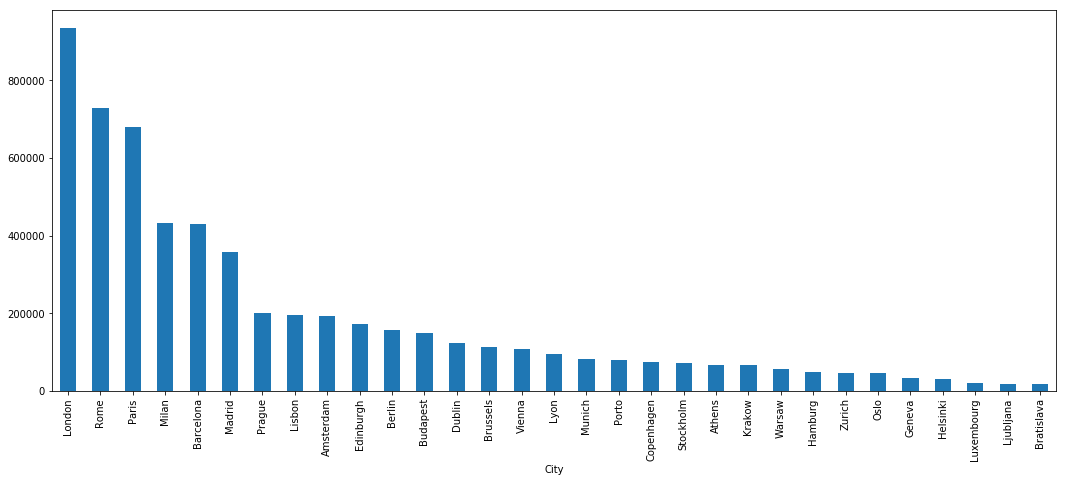

In [84]:
plt.figure(figsize=(18, 7))
df.groupby('City')['Number_of_Reviews'].sum().sort_values(ascending=False).plot(kind='bar')

На графике видно, что чем больше город, тем больше отзывов.
Добавим признак отношения рейтинга в городе к количеству отзывов в этом городе.

In [85]:
df['Rank_to_Reviews'] = df['Ranking'] / df['City'].map(df.groupby('City')['Number_of_Reviews'].sum())

## URL_TA и ID_TA

In [86]:
df['ID_INT'] = df['ID_TA'].apply(lambda x: int(x[1:]))

In [87]:
df['URL_INT'] = df['URL_TA'].str.split('-').apply(lambda s: int(s[1][1:]))

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

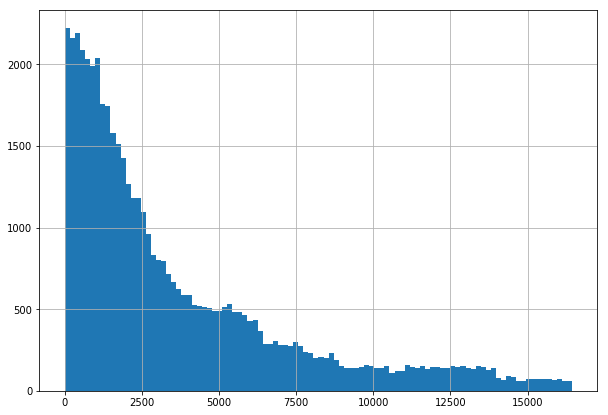

In [98]:
plt.rcParams['figure.figsize'] = (10,7)
df['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

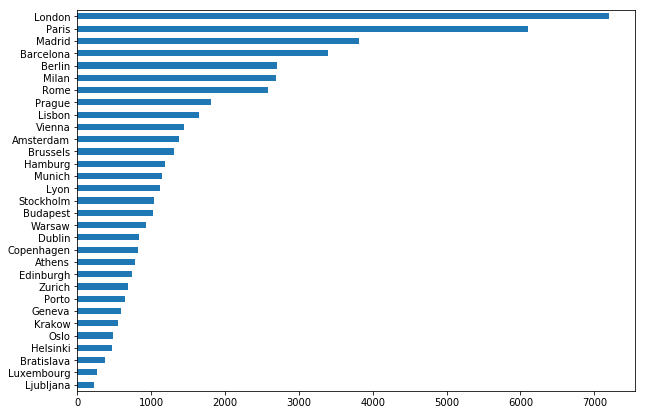

In [99]:
df['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

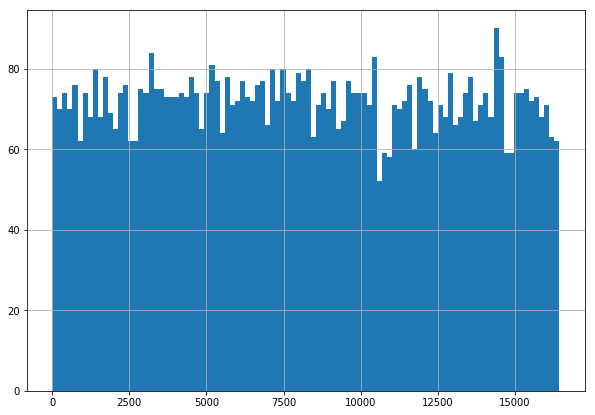

In [100]:
df['Ranking'][df['City'] =='London'].hist(bins=100)

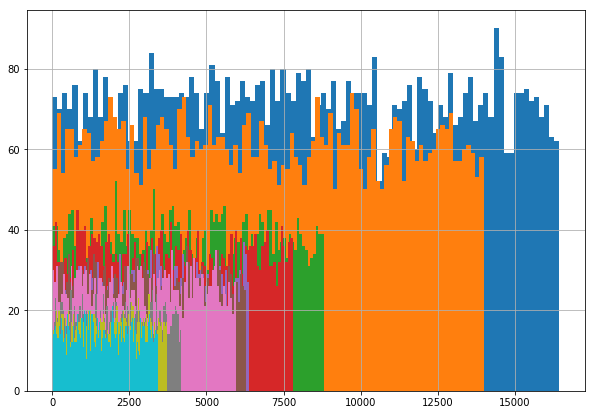

In [101]:
# посмотрим на топ 10 городов
for x in (df['City'].value_counts())[0:10].index:
    df['Ranking'][df['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение, так что добавить новый признак с отношением к количеству ресторанов в городе.

### Посмотрим распределение целевой переменной

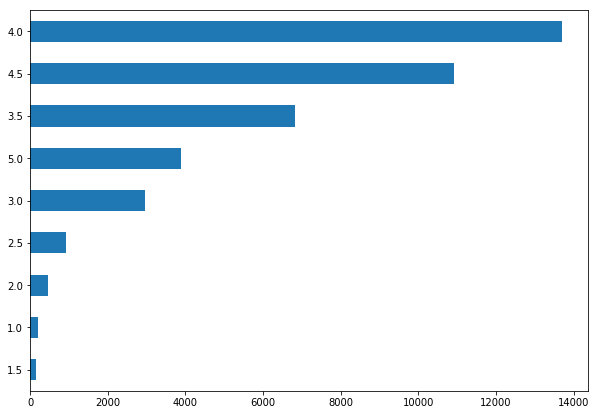

In [109]:
df[df['sample'] == 1]['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

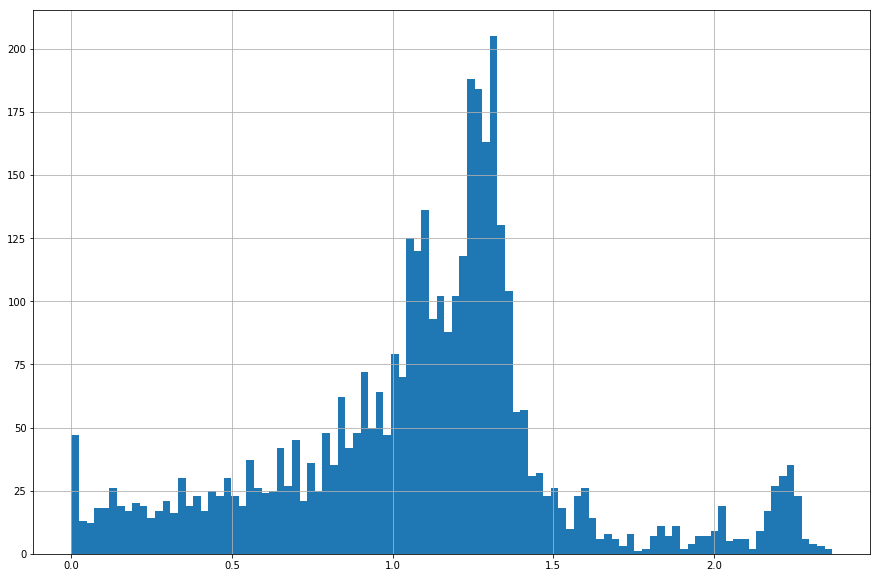

In [114]:
df[df['sample'] == 1]['Ranking_Norm'][df['Rating'] == 5].hist(bins=100)

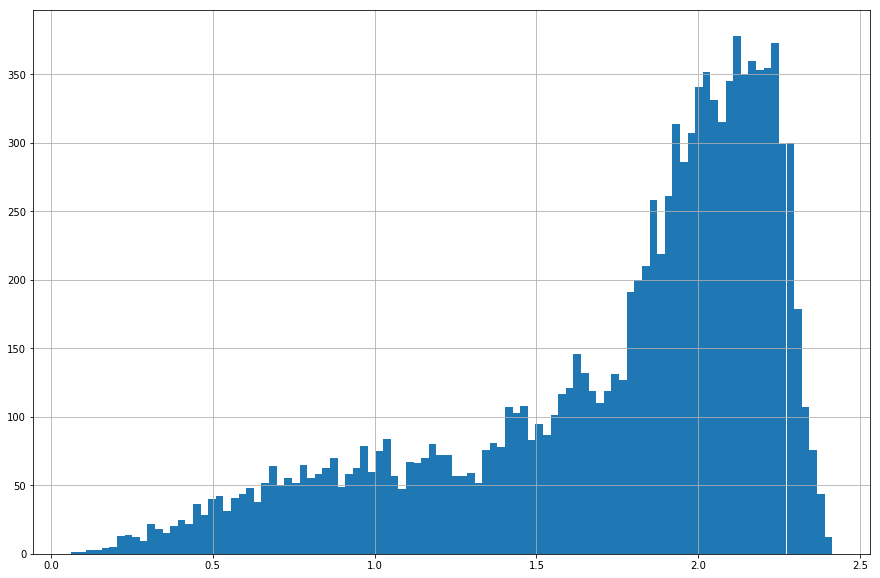

In [113]:
df[df['sample'] == 1]['Ranking_Norm'][df['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

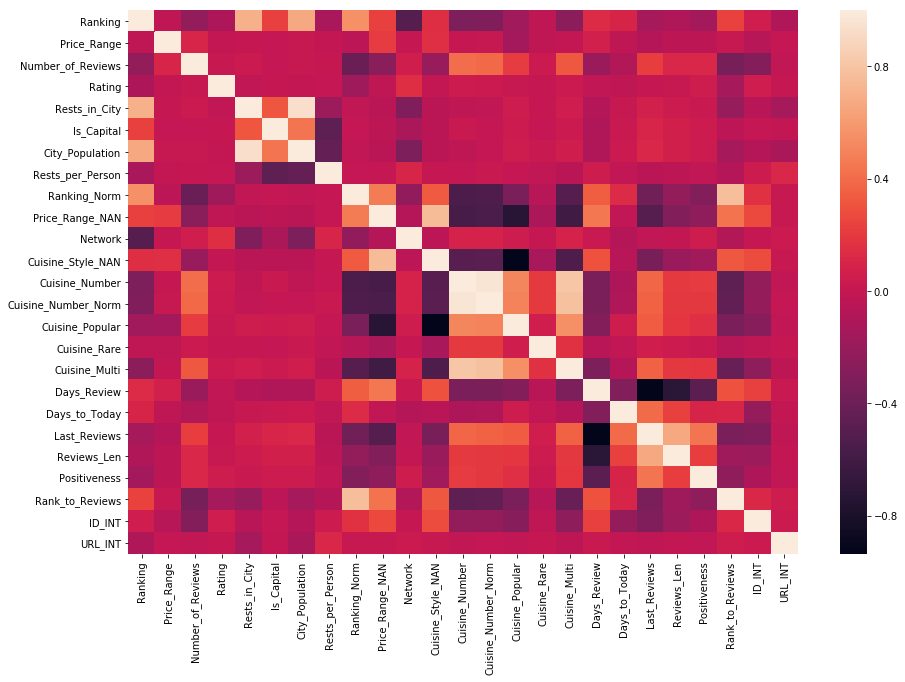

In [112]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.drop(['sample'], axis=1).corr(),)

Часть признаков сильно коррелирует между собой

# Dummies

Разбираем dummy переменные

In [115]:
df_city = pd.get_dummies(df['City'], prefix = 'City_Range')
df_price_range = pd.get_dummies(df['Price_Range'], prefix = 'Price_Range')
df_country = pd.get_dummies(df['Country'], prefix = 'Country_Range')
df_cuisine = pd.get_dummies(df['Cuisine_Top'].explode(), prefix = 'Cuisine_Range').sum(level=0)

In [121]:
cols = ['Price_Range', 'Number_of_Reviews', 'Positiveness',
       'Network', 'Rests_in_City', 'Is_Capital', 'City_Population',
       'Rests_per_Person', 'Ranking_Norm', 'Cuisine_Style_NAN',
       'Cuisine_Number_Norm', 'Cuisine_Number', 'Cuisine_Rare',
       'Cuisine_Popular', 'Cuisine_Multi', 'Price_Range_NAN',
       'Days_Review', 'Days_to_Today', 'Reviews_Len',
       'Rank_to_Reviews', 'ID_INT', 'URL_INT', 'sample', 'Rating']
df1 = pd.concat([df[cols],df_city], axis=1)
df1 = pd.concat([df1,df_price_range], axis=1)
df1 = pd.concat([df1,df_country], axis=1)
df1 = pd.concat([df1,df_cuisine], axis=1)

In [122]:
df1.corr().Rating.sort_values(ascending=False).to_frame()

,Rating
Rating,1.000000
sample,0.936543
Network,0.150831
ID_INT,0.049589
Positiveness,0.045012
...,...
City_Range_Milan,-0.023233
Days_to_Today,-0.024984
Price_Range_2.0,-0.030353
Rank_to_Reviews,-0.135067


#### Запускаем и проверяем что получилось

In [124]:
# Теперь выделим тестовую часть
train_data = df1.query('sample == 1').drop(['sample'], axis=1)
test_data = df1.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [125]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [126]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 113), (40000, 113), (40000, 112), (32000, 112), (8000, 112))

# Model 
Сам ML

In [127]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [128]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [129]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [131]:
y_pred = pd.Series(y_pred).apply(lambda x: round(x * 2.0)/2) # Округлим ответ под допустимые значения целевой переменной

In [132]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1630625


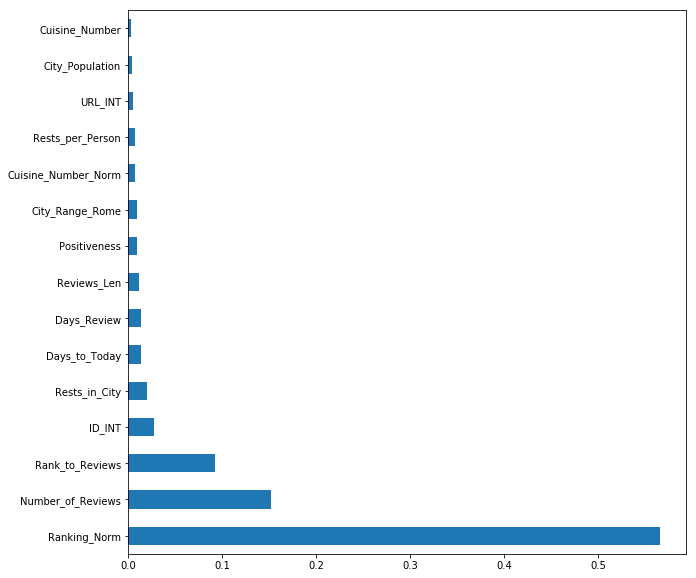

In [133]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [134]:
test_data.sample(10)

,Price_Range,Number_of_Reviews,Positiveness,Network,Rests_in_City,Is_Capital,City_Population,Rests_per_Person,Ranking_Norm,Cuisine_Style_NAN,...,Cuisine_Range_Pizza,Cuisine_Range_Portuguese,Cuisine_Range_Pub,Cuisine_Range_Seafood,Cuisine_Range_Spanish,Cuisine_Range_Sushi,Cuisine_Range_Thai,Cuisine_Range_Vegan Options,Cuisine_Range_Vegetarian Friendly,Cuisine_Range_Wine Bar
5509,2.0,0.0,0.000000,0,776,1,664046.0,0.001169,1.878866,0,...,0,0,0,0,0,0,0,0,0,0
6146,3.0,63.0,0.083333,1,7193,1,10979000.0,0.000655,0.708884,0,...,0,0,0,0,0,0,0,1,1,0
9545,2.0,3.0,0.250000,0,1443,1,1840573.0,0.000784,1.097020,1,...,0,0,0,0,0,0,0,0,0,0
7505,2.0,3.0,0.200000,0,7193,1,10979000.0,0.000655,1.970249,1,...,0,0,0,0,0,0,0,0,0,0
4809,2.0,62.0,0.000000,1,3813,1,3266126.0,0.001167,2.262261,0,...,0,0,0,0,1,0,0,0,0,0
8524,1.0,579.0,0.200000,1,1647,1,506654.0,0.003251,0.020644,0,...,0,1,0,0,0,0,0,0,0,0
4432,2.0,0.0,0.000000,1,1647,1,506654.0,0.003251,1.774742,1,...,0,0,0,0,0,0,0,0,0,0
4838,2.0,305.0,0.333333,1,2694,0,1351562.0,0.001993,0.278396,0,...,0,0,0,0,0,0,0,0,1,0
6558,2.0,437.0,0.125000,1,2589,1,2872800.0,0.000901,1.809193,0,...,1,0,0,0,0,0,0,0,1,0
7527,2.0,124.0,0.166667,1,6108,1,11020000.0,0.000554,0.972168,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
test_data = test_data.drop(['Rating'], axis=1)

In [136]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [137]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [138]:
predict_submission

array([3.035, 4.28 , 4.445, ..., 3.01 , 4.49 , 4.175])

In [139]:
predict_submission = pd.Series(predict_submission).apply(lambda x: round(x * 2.0)/2)

In [140]:
predict_submission

0       3.0
1       4.5
2       4.5
3       4.5
4       4.5
       ... 
9995    4.5
9996    4.0
9997    3.0
9998    4.5
9999    4.0
Length: 10000, dtype: float64

In [141]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5
